In [24]:
cd("$(homedir())/Documents/Repos/enso_project.jl")
using Pkg
Pkg.activate(".")

  Activating project at `C:\Users\lisah\Documents\Repos\enso_project.jl`


In [25]:
using ReservoirComputing, CSV, DataFrames, DynamicalSystems, Plots, enso_project, Statistics

In [26]:
sst_1D = CSV.read("data/sst_data/sst_34_format.csv", DataFrame)
data_emb, τ = enso_project.tde_with_negative_shift(sst_1D[:, "ANOM_3"])
train_data, val_data, test_data = enso_project.train_val_test_split(data_emb);

Algorithm stopped due to convergence of E₁-statistic. Valid embedding achieved ✓.


In [27]:
data_1D = sst_1D[:,"ANOM_3"]';

In [28]:
spectral_radii = [0.8, 0.9, 1.0]
sparsities = [0.05, 0.08, 0.1, 0.2]
input_scales = [0.1, 0.5, 1.0, 2.0]
ridge_values = [0.0, 1e-6, 1e-5]
reservoir_sizes = [90, 120, 135, 140, 160, 180, 200]

param_grid = enso_project.create_param_grid(reservoir_sizes, spectral_radii, sparsities, input_scales, ridge_values);

### example

In [29]:
esn, W_out, val_loss = enso_project.cross_validate_esn(train_data', val_data', param_grid)

enso_project.ESNHyperparams(90, 0.8, 0.05, 0.1, 0.0)
Validation loss = 296.7973848047319
enso_project.ESNHyperparams(120, 0.8, 0.05, 0.1, 0.0)
Validation loss = 264.3639439898855
enso_project.ESNHyperparams(140, 0.9, 0.05, 0.1, 0.0)
Validation loss = 207.54573468954146
enso_project.ESNHyperparams(160, 0.9, 0.05, 0.1, 0.0)
Validation loss = 206.73851832007705
enso_project.ESNHyperparams(135, 1.0, 0.05, 0.1, 0.0)
Validation loss = 192.96938464079673
enso_project.ESNHyperparams(140, 0.8, 0.1, 0.1, 0.0)
Validation loss = 185.3513360691627
enso_project.ESNHyperparams(180, 1.0, 0.1, 0.1, 0.0)
Validation loss = 177.85547091402097
enso_project.ESNHyperparams(120, 1.0, 0.2, 0.1, 0.0)
Validation loss = 170.52433570171104


(ESN(5 => 120), OutputLayer successfully trained with output size: 5, 170.52433570171104)

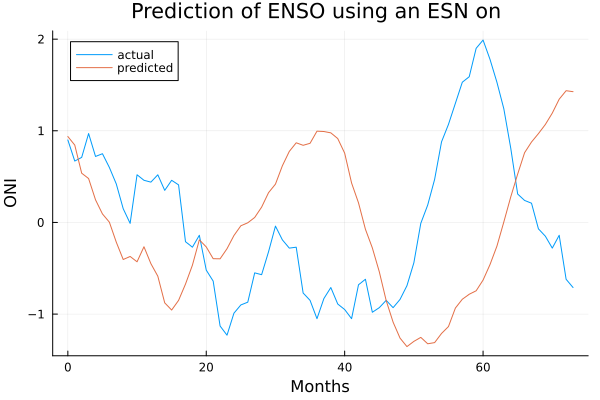

In [30]:
enso_project.plot_esn_prediction(esn, W_out, test_data', "")

### error analysis

In [31]:
train_size = 300
initial_val_size = 50;

In [32]:
# sample size N
N = 100

# lead time L
L = 20

20

In [33]:
predictions_tde, datasets_test_tde = enso_project.sample_lead_times(L,N,data_emb', train_size, initial_val_size,param_grid)

enso_project.ESNHyperparams(90, 0.8, 0.05, 0.1, 0.0)
Validation loss = 257.5757904826939
enso_project.ESNHyperparams(140, 0.8, 0.05, 0.1, 0.0)
Validation loss = 101.67203407632556
enso_project.ESNHyperparams(120, 0.8, 0.08, 0.1, 0.0)
Validation loss = 89.94742631688132
enso_project.ESNHyperparams(120, 0.9, 0.08, 0.1, 0.0)
Validation loss = 53.55307403483288
enso_project.ESNHyperparams(120, 0.9, 0.08, 0.1, 1.0e-6)
Validation loss = 52.997621597987646
enso_project.ESNHyperparams(120, 0.9, 0.08, 0.1, 1.0e-5)
Validation loss = 52.05938536668557
Finished sample 1
enso_project.ESNHyperparams(90, 0.8, 0.05, 0.1, 0.0)
Validation loss = 259.00373889007085
enso_project.ESNHyperparams(140, 0.8, 0.05, 0.1, 0.0)
Validation loss = 102.55481089144111
enso_project.ESNHyperparams(120, 0.8, 0.08, 0.1, 0.0)
Validation loss = 97.84660436545727
enso_project.ESNHyperparams(120, 0.9, 0.08, 0.1, 0.0)
Validation loss = 55.43518431732211
enso_project.ESNHyperparams(120, 0.9, 0.08, 0.1, 1.0e-6)
Validation loss =

([-0.5439356757955818 -0.4283625436013314 … 0.31121779195312116 0.30412766223171883; -0.20062827204434538 -0.3481978046698986 … 0.2662947567067278 0.31328960955486895; … ; -0.34705549021632726 -0.09783764794158196 … 0.46685965878071367 0.48972050770937714; -0.06146887222788125 0.17849188539380526 … 0.4614276983986826 0.417291769120341], [-0.22 0.11 … 0.31 0.43; 0.11 -0.3 … 0.43 0.75; … ; -0.32 -0.04 … -0.93 -0.84; -0.04 -0.19 … -0.84 -0.69])

In [34]:
predictions_no_tde, datasets_test_no_tde = enso_project.sample_lead_times(L,N,data_1D, train_size, initial_val_size,param_grid)

enso_project.ESNHyperparams(90, 0.8, 0.05, 0.1, 0.0)
Validation loss = 70.02201811612241
enso_project.ESNHyperparams(135, 0.8, 0.05, 0.1, 0.0)
Validation loss = 34.76091775664358
enso_project.ESNHyperparams(140, 0.8, 0.05, 0.1, 0.0)
Validation loss = 25.419266163010406
enso_project.ESNHyperparams(140, 0.9, 0.05, 0.1, 0.0)
Validation loss = 19.687302756655612
enso_project.ESNHyperparams(200, 0.9, 0.2, 0.1, 1.0e-6)
Validation loss = 19.30489827896467
Finished sample 1
enso_project.ESNHyperparams(90, 0.8, 0.05, 0.1, 0.0)
Validation loss = 70.97988859999451
enso_project.ESNHyperparams(135, 0.8, 0.05, 0.1, 0.0)
Validation loss = 35.02612766088879
enso_project.ESNHyperparams(140, 0.8, 0.05, 0.1, 0.0)
Validation loss = 25.5766113828986
enso_project.ESNHyperparams(140, 0.9, 0.05, 0.1, 0.0)
Validation loss = 19.914790296150677
enso_project.ESNHyperparams(200, 0.9, 0.2, 0.1, 1.0e-6)
Validation loss = 19.30774551579225
Finished sample 2
enso_project.ESNHyperparams(90, 0.8, 0.05, 0.1, 0.0)
Validat

([-0.6373879298695613 -0.789612594085142 … 1.4576880325215171 1.4480788742808812; -0.8671662580456996 -0.3975731216932701 … 1.1878364846871818 1.0950585797598507; … ; 0.6591621481896262 0.5835915662332667 … -0.187459526966673 -0.3079553927495666; 0.6654231284057452 0.5239722905749975 … -0.01647603024391442 -0.042052092410354014], [-0.83 -0.76 … 0.44 0.36; -0.76 -0.39 … 0.36 0.5; … ; 0.75 0.6 … -1.23 -0.99; 0.6 0.42 … -0.99 -0.9])

In [35]:

CSV.write("C:/Users/lisah/Documents/Repos/enso_project.jl/temp_saves/error_saves/enso_tde_L$(L)_N$(N)_predictions.csv", DataFrame(predictions_tde, :auto))
CSV.write("C:/Users/lisah/Documents/Repos/enso_project.jl/temp_saves/error_saves/enso_tde_L$(L)_N$(N)_testsets.csv", DataFrame(datasets_test_tde, :auto))

CSV.write("C:/Users/lisah/Documents/Repos/enso_project.jl/temp_saves/error_saves/enso_no_tde_L$(L)_N$(N)_predictions.csv", DataFrame(predictions_no_tde, :auto))
CSV.write("C:/Users/lisah/Documents/Repos/enso_project.jl/temp_saves/error_saves/enso_no_tde_L$(L)_N$(N)_testsets.csv", DataFrame(datasets_test_no_tde, :auto))


"C:/Users/lisah/Documents/Repos/enso_project.jl/temp_saves/error_saves/enso_no_tde_L20_N100_testsets.csv"

In [36]:
#predictions = Matrix(CSV.read("C:/Users/lisah/Documents/Repos/enso_project.jl/temp_saves/error_saves/enso_L$(L)_N$(N)_predictions.csv", DataFrame))
#datasets_test = Matrix(CSV.read("C:/Users/lisah/Documents/Repos/enso_project.jl/temp_saves/error_saves/enso_L$(L)_N$(N)_testsets.csv", DataFrame));

In [37]:
pcc_vals_tde = enso_project.pcc(predictions_tde, datasets_test_tde);
rmse_vals_tde = enso_project.rmse(predictions_tde, datasets_test_tde);
hss_vals_tde = enso_project.hss(predictions_tde, datasets_test_tde);

pcc_vals_no_tde = enso_project.pcc(predictions_no_tde, datasets_test_no_tde);
rmse_vals_no_tde = enso_project.rmse(predictions_no_tde, datasets_test_no_tde);
hss_vals_no_tde = enso_project.hss(predictions_no_tde, datasets_test_no_tde);

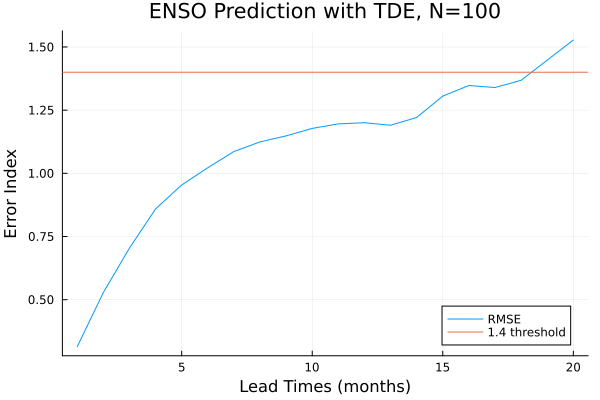

In [42]:
plot(rmse_vals_tde, label="RMSE", xlabel="Lead Times (months)", ylabel="Error Index", title="ENSO Prediction with TDE, N=$N")
hline!([1.4], label="1.4 threshold")

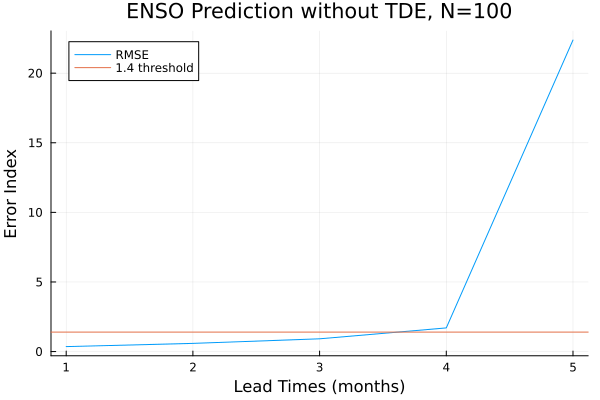

In [43]:
plot(rmse_vals_no_tde[1:5], label="RMSE", xlabel="Lead Times (months)", ylabel="Error Index", title="ENSO Prediction without TDE, N=$N")
hline!([1.4], label="1.4 threshold")

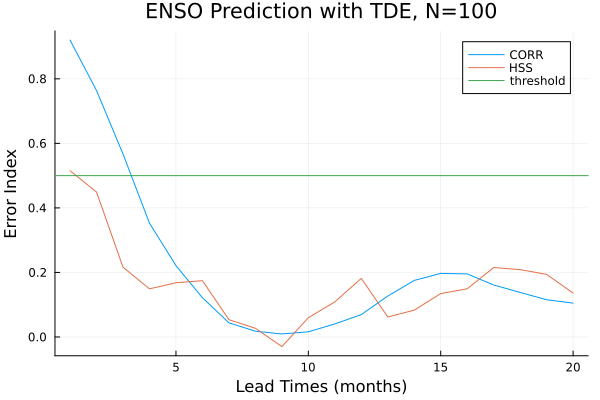

In [45]:
plot(pcc_vals_tde, label="CORR", xlabel="Lead Times (months)", ylabel="Error Index", title="ENSO Prediction with TDE, N=$N")
plot!(hss_vals_tde, label="HSS")
hline!([0.5], label = "threshold")
#savefig("C:/Users/lisah/Documents/Repos/enso_project.jl/temp_saves/fig_saves/enso_error.png")

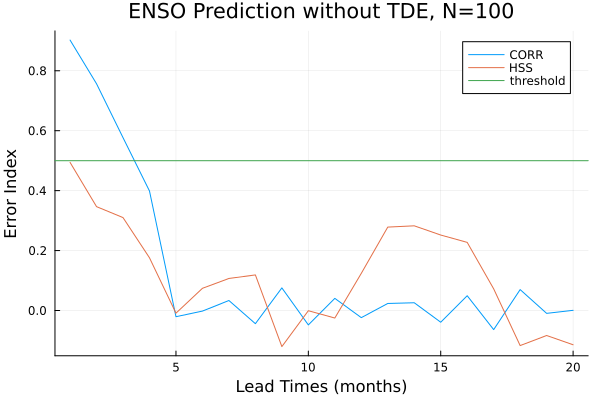

In [46]:
plot(pcc_vals_no_tde, label="CORR", xlabel="Lead Times (months)", ylabel="Error Index", title="ENSO Prediction without TDE, N=$N")
plot!(hss_vals_no_tde, label="HSS")
hline!([0.5], label = "threshold")